In [1]:
### QUESTION 1
# conda environment name : lab1
# all script and .yml file are zipped inside the zip file

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [3]:
### QUESTION 2
boston = open("boston.txt","r")

# Change the text in the file into string data type
text = boston.read() 
boston.close()

In [4]:
print(text)

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        100

In [5]:
# Split each line in the txt.file as a list. Each new line will be considered as an element in the newline_split list.
newline_split = text.split('\n') 

# Create containers for three main component of the txt.file
body_paragraph = [] # First Intro Paragraph
variables = [] # The description of the column name
row_data = [] # All the numerical data

content = [body_paragraph, variables, row_data] # container for each paragraphs

# Iterate all the element in newline_split list, and group all the line from each paragraph into the designated container
i = 0
n = 0

for line in newline_split: 
    if line != "":
        content[n].append(line)
        i+=1
    elif line == "":
        i+=1
        n+=1

In [6]:
## Extracting the column name

column_name = []

for var in content[1][1:]:
    linesplit = var.split()
    column_name.append(linesplit[0])

In [7]:
## Processing numerical data

# Beacuse of the parsing method that I use, the data from "B", "LSTAT", and "MEDV" is seperated from the data from another column
# Thus, I need to every two elements in the row_data list. So that each combined element can represent the row data in the boston
# house pricing data.

# Combining seperate data from one row due to previous parsing
length = int(len(row_data))
combined_row_data = []

i = 0

while i < length:
    combined_row = row_data[i] + row_data[i+1] # Combine the current element and the next element in row_data list
    combined_row_data.append(combined_row)
    i+=2 # Advance two steps

# Converting each element of combined_row_data into a list containing data (int) for each row
new_row_data = []
for row in combined_row_data:
    new_row = row.split()
    for i in range(len(new_row)):
        new_row[i] = float(new_row[i])
    new_row_data.append(new_row)

In [8]:
## Creating dictionary for Pandas Dataframe
csv_dict = {}

for i in range(len(column_name)):
    temp_list = []
    for j in range(len(new_row_data)):
        temp_list.append(new_row_data[j][i])
    csv_dict[column_name[i]] = temp_list

In [9]:
## Creating Pandas Data Frame
csv = pd.DataFrame(csv_dict)
csv.to_csv('boston.csv', index=False) # Download data as CSV
csv

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


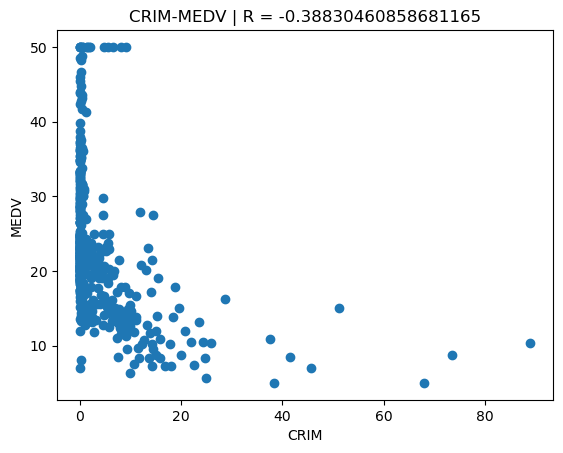

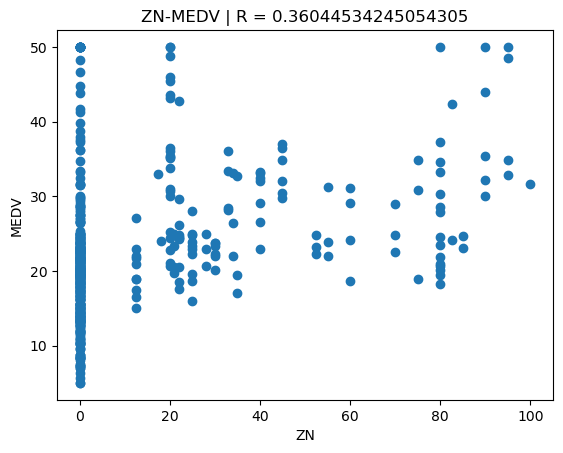

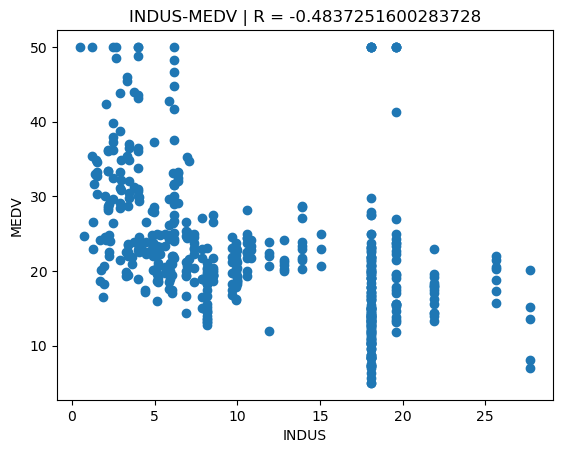

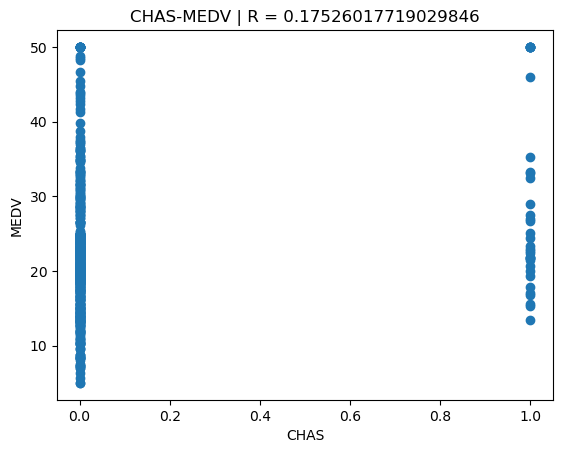

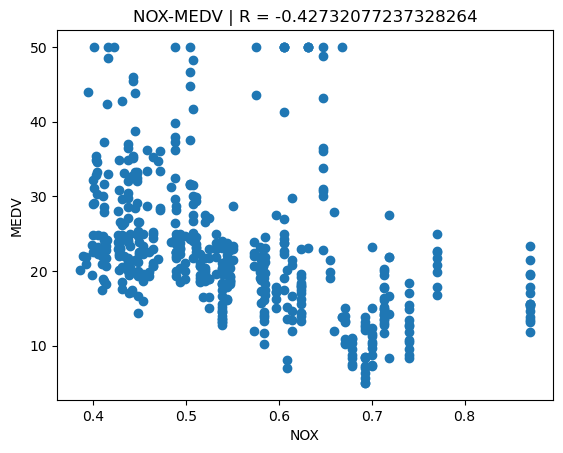

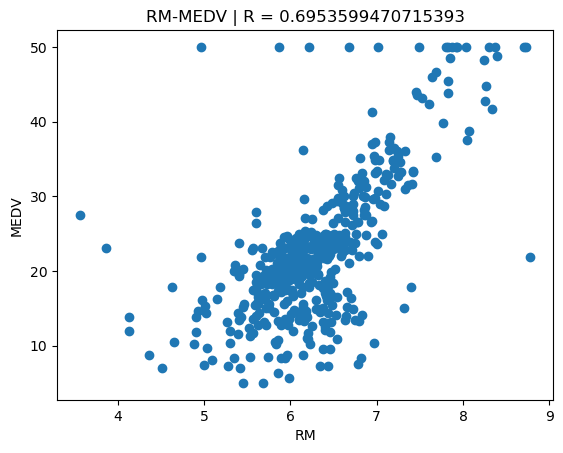

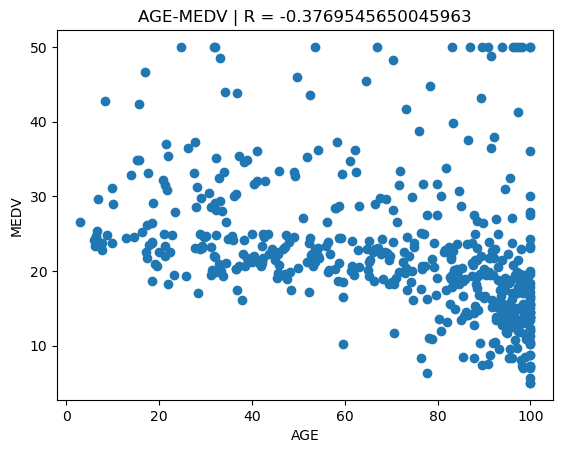

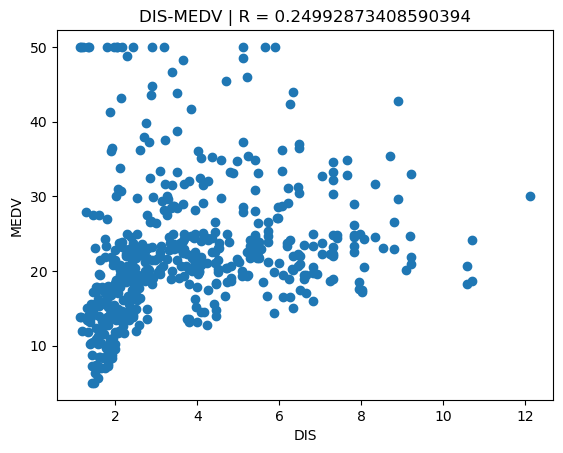

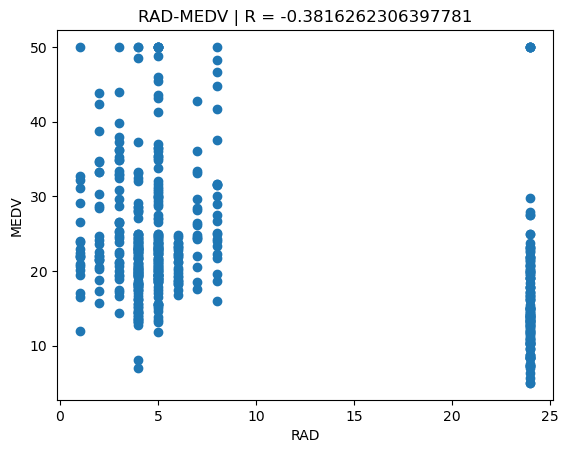

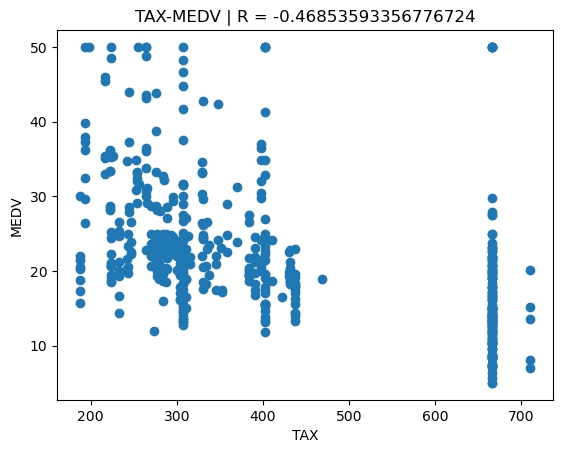

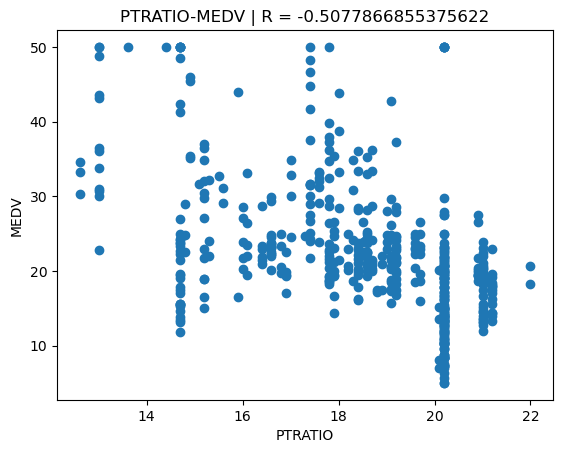

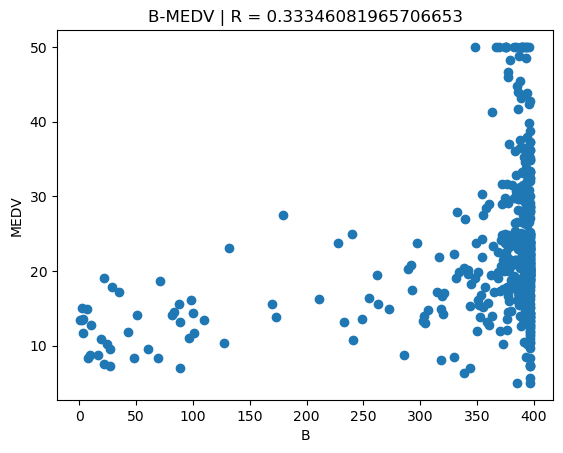

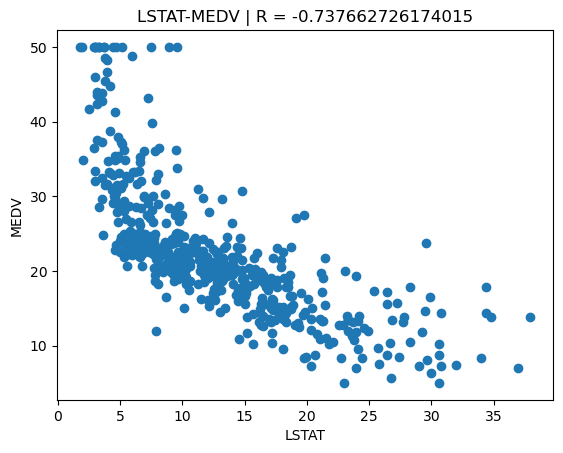

In [10]:
### QUESTION 3
r_list = []

# For each column (except "MEDV" column), data will be plotted as the y axis. While the "MEDV" column will be plotted as the x axis
for i in range(len(column_name)-1):
    r = np.corrcoef(csv[column_name[i]],csv['MEDV'])
    r_list.append(r)
    plt.scatter(csv[column_name[i]],csv['MEDV'])
    plt.title("{xaxis}-MEDV | R = {val}".format(xaxis = column_name[i], val = r[0,1]))
    plt.xlabel(column_name[i])
    plt.ylabel('MEDV')
    plt.show()

In [11]:
# From the scatterplots, the LSTAT_MEDV (% Lower status population) has the highest (absolute)
# value of correlation coefficient, whhich is -0.737662726174015. This indicates that LSTAT column
# is more preferable to be used for the house price prediction linear model.

In [12]:
### QUESTION 4
# Completely random (?)
def lm(x,y): 
    m = -np.random.uniform(0,np.max(y))/np.random.uniform(0,np.max(x))
    b = np.random.uniform(0,np.max(y))
    return m, b
param = lm(csv['LSTAT'],csv['MEDV'])
param

(-1.085919177831466, 25.22062004400852)

In [13]:
### QUESTION 5
# Insert the value of m and b to the linear equation
y_pred = []
for x in csv['LSTAT']:
    y = param[0]*x + param[1] 
    y_pred.append(y)

In [14]:
### QUESTION 6
def mae(y, y_pred):
    # Creating container of deviation for each element
    sum_error = 0 
    for i in range(len(y)):
        # Calculating deviations for each element in y and y_pred
        deviation = np.absolute(y[i] - y_pred[i]) 
        sum_error += deviation # sum all of the deviations
        error = sum_error/len(y) # sum of error divided by the number of elements
    return error

mae_temp = mae(csv['MEDV'], y_pred)

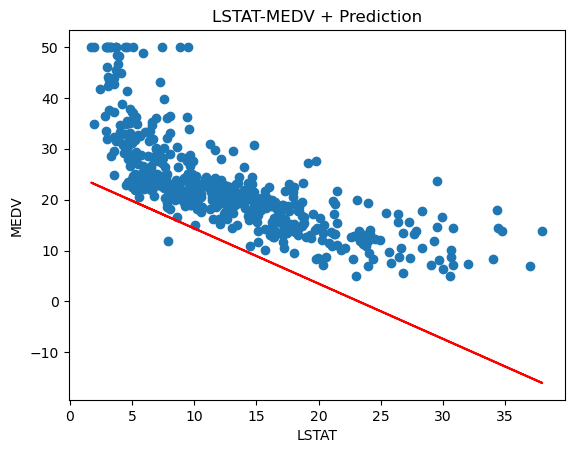

In [15]:
### QUESTION 7
plt.scatter(csv['LSTAT'],csv['MEDV'])
plt.plot(csv['LSTAT'],y_pred,c='red')
plt.title("LSTAT-MEDV + Prediction")
plt.xlabel(column_name[i])
plt.ylabel('MEDV')
plt.show()

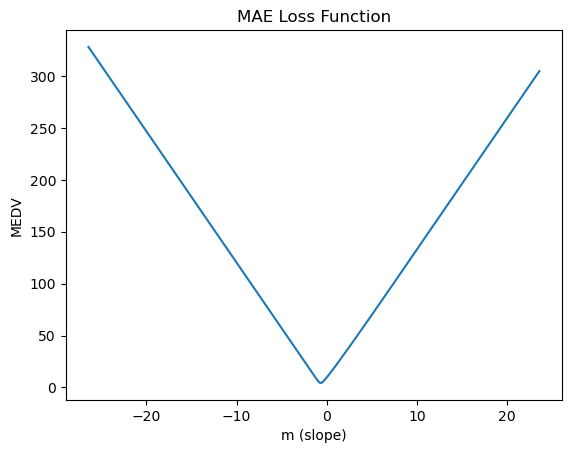

the optimized m for b = -0.6599320185273712 is 30.882967889368715


In [16]:
### QUESTION 8
def lm(x,y): # This time, it is not random
    np.random.seed(42)
    m_temp = -np.random.uniform(0,np.max(y))/np.random.uniform(0,np.max(x)) # temporary false m
    b_temp = np.random.uniform(0,np.max(y)) # temporary false b
    h = 0.05 # step
    boundary = h*500
    mae_list = []
    m_span = np.linspace(m_temp-boundary, m_temp+boundary, int(2*boundary/h)) # Creating range of loss function
    for beta1 in m_span:
        y_pred=[]
        for element in x:
            res = beta1*element + b_temp
            y_pred.append(res)
        mae_val = mae(csv['MEDV'],y_pred)
        mae_list.append(mae_val) # adding list of mae value in respect to the value of m and b
    m = m_span[mae_list.index(min(mae_list))] # The global minimal in the mae function will be the optimized m
    b = (np.sum(y)-m*np.sum(x))/len(x) # using least-square closed-form solution
    return m_span, mae_list, m, b
GD_param = lm(csv['LSTAT'],csv['MEDV'])
plt.plot(GD_param[0], GD_param[1])
plt.xlabel('m (slope)')
plt.ylabel('MEDV')
plt.title('MAE Loss Function')
plt.show()
print('the optimized m for b = {} is {}'.format(GD_param[2], GD_param[3]))


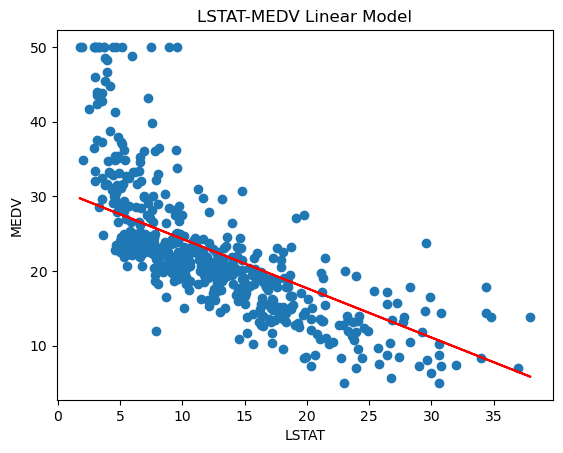

In [17]:
### QUESTION 9
predict_house_price = []
new_m = GD_param[2]
new_b = GD_param[3]
for x in csv['LSTAT']:
    price = new_m*x + new_b # Insert the value of optimized m and optimized b to the linear equation
    predict_house_price.append(price)
    
plt.scatter(csv['LSTAT'],csv['MEDV'])
plt.plot(csv['LSTAT'],predict_house_price,c='red')
plt.title("LSTAT-MEDV Linear Model")
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

In [18]:
### QUESTION 10
linmodel_mae = mae(csv['MEDV'],predict_house_price)
print('mean absolute error before optimization is',mae_temp)
print('mean absolute error for optimal m and b is',linmodel_mae)

mean absolute error before optimization is 11.071218679217688
mean absolute error for optimal m and b is 4.656870649799025
